# Independent Lab: Inferential Statistics in Python
BGEN632

**Author:** Brandon Kittle 
**Date:** 04/26/2025
**Assignment:** Independent Lab - Week 9

## Introduction

The purpose of this lab is to apply inferential statistical methods in Python by building and validating a multiple regression model. Using employee questionnaire data regarding attitudes, perceived usefulness, satisfaction, and system adoption intent, we aim to:

- Develop a regression model predicting system adoption intent (intent1_01).
- Validate core regression assumptions: linearity, collinearity, homoscedasticity, independence, and normality.
- Interpret overall model significance and individual predictor significance.
- Draw business-relevant conclusions about the key drivers of system adoption.

This lab demonstrates an end-to-end inferential analysis, from data preparation through model interpretation, supporting business decision-making for organizational technology adoption initiatives.


As always, we will first import libraries and set up the enviroment. 

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import shapiro, pearsonr
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import os
from statsmodels.stats.stattools import durbin_watson

os.chdir("C:/Users/brand/Documents/GitHub/week9labs/data")
os.getcwd()



'C:\\Users\\brand\\Documents\\GitHub\\week9labs\\data'

We will then load the data. 

In [5]:
ect_df = pd.read_table('ect_data.txt', sep='\t')
ect_df.info()
ect_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   attitude1_01  201 non-null    int64
 1   attitude1_02  201 non-null    int64
 2   attitude1_03  201 non-null    int64
 3   attitude1_04  201 non-null    int64
 4   intent1_01    201 non-null    int64
 5   intent1_02    201 non-null    int64
 6   intent1_03    201 non-null    int64
 7   intent1_04    201 non-null    int64
 8   peruse01      201 non-null    int64
 9   peruse02      201 non-null    int64
 10  peruse03      201 non-null    int64
 11  peruse04      201 non-null    int64
 12  satis01       201 non-null    int64
 13  satis02       201 non-null    int64
 14  satis03       201 non-null    int64
 15  satis04       201 non-null    int64
dtypes: int64(16)
memory usage: 25.3 KB


,attitude1_01,attitude1_02,attitude1_03,attitude1_04,intent1_01,intent1_02,intent1_03,intent1_04,peruse01,peruse02,peruse03,peruse04,satis01,satis02,satis03,satis04
0,6,6,6,6,6,6,6,6,6,4,5,5,5,5,5,5
1,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6
2,6,6,6,6,7,7,7,7,6,5,5,5,5,5,5,5
3,7,7,7,7,6,6,7,6,5,5,5,5,7,6,7,6
4,7,7,6,6,7,7,7,6,6,6,7,7,6,6,6,6


Now we will select 5 predictors and 1 target variable. 

In [6]:
predictors = ['attitude1_01', 'attitude1_02', 'peruse01', 'satis01', 'satis02']
target = 'intent1_01'

# data frame based on the predictors and target
model_df = ect_df[[target] + predictors]
model_df.head()

,intent1_01,attitude1_01,attitude1_02,peruse01,satis01,satis02
0,6,6,6,6,5,5
1,7,7,7,7,7,6
2,7,6,6,6,5,5
3,6,7,7,5,7,6
4,7,7,7,6,6,6


Now its time to build the model. Luckily, for Jason Triche's class a year ago, I built a similar model using python rather then R. We were preforming a linear regression model over a dataset from the Watsons Children center. While I did alot more then what we are doing here, should be fairly similiar as I adept the code to fit our needs. A few things might be different then what we were shown in class. However, I did learn a few great ways to explore data using that dataset. I will be using some of those methods here. The formatting tones will now be more professional as well as we begin to explore the data, create any workflows, and build / evaluate the model. Using similar language and formatting I've been picking up in Dr. Chandlers class with Rmd files. 

In [7]:
# linear regression model
lin_reg = smf.ols(formula='intent1_01 ~ attitude1_01 + attitude1_02 + peruse01 + satis01 + satis02', data=model_df).fit()

# summary
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             intent1_01   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     45.01
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           9.40e-31
Time:                        00:28:47   Log-Likelihood:                -211.54
No. Observations:                 201   AIC:                             435.1
Df Residuals:                     195   BIC:                             454.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.9961      0.353      2.826      0.005       0.301       1.691
attitude1_01     0.3098      0.095      3.252      0.001       0.122       0.498
attitude1_02     0.1481      0.076      1.960      0.051      -0.001       0.297
peruse01         0.2337      0.058      4.061      0.000       0.120       0.347
satis01          0.1676      0.094      1.779      0.077      -0.018       0.353
satis02          0.0215      0.089      0.240      0.810      -0.155       0.198
==============================================================================
Omnibus:                       61.979   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.788
Skew:                          -1.088   Prob(JB):                     3.58e-65
Kurtosis:                       8.541   Cond. No.                         94.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation**:  
The F-test is statistically significant, indicating that at least one predictor variable is significantly associated with intent1_01. The overall regression model is a good fit for the data.

### Individual Predictor Significance (T-tests)

| Predictor      | Coefficient | p-value | Significant? |
|:---------------|:------------|:--------|:-------------|
| **attitude1_01** | 0.3098      | 0.001    | Yes |
| attitude1_02    | 0.1481      | 0.051    | Borderline |
| **peruse01**    | 0.2337      | 0.000    | Yes |
| satis01         | 0.1676      | 0.077    | No |
| satis02         | 0.0215      | 0.810    | No |

**Interpretation**:  
Based on the t-tests, attitude1_01 and peruse01 are `statistically significant` predictors of intent1_01 at the 0.05 level. The other variables are not significant.

### Business Interpretation of Significant Variables

**attitude1_01**  
- Coefficient = +0.3098
- Each additional unit increase in positive attitude toward the system is associated with a 0.3098 increase in system adoption intent, holding other factors constant.
- **Business relevance**: Improving employee attitudes can significantly boost system adoption rates.

**peruse01**  
- Coefficient = +0.2337
- Each additional unit increase in perceived usefulness is associated with a 0.2337 increase in system adoption intent.
- **Business relevance**: Highlighting the system's usefulness and practical benefits can enhance employee buy-in.

**Next Steps**:
Now we need to do is to preform additional verifications of our model. First is to check the linearity of the data. We can do this by plotting the data and looking for the linear pattern. This process will help us determine the validation of our model. 

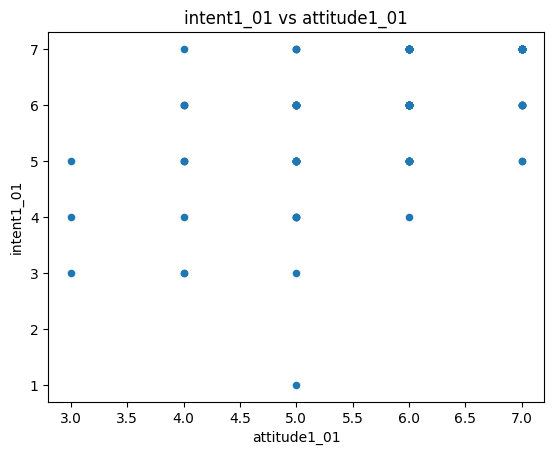

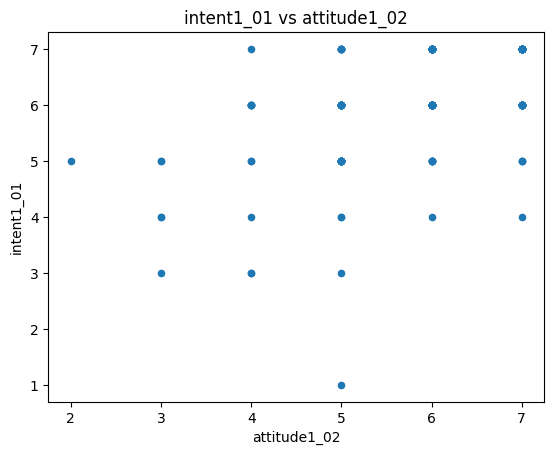

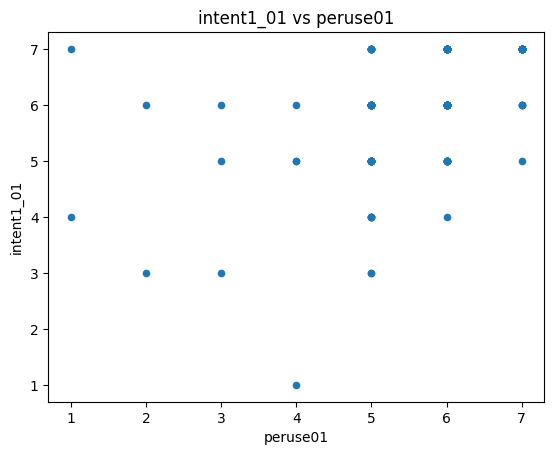

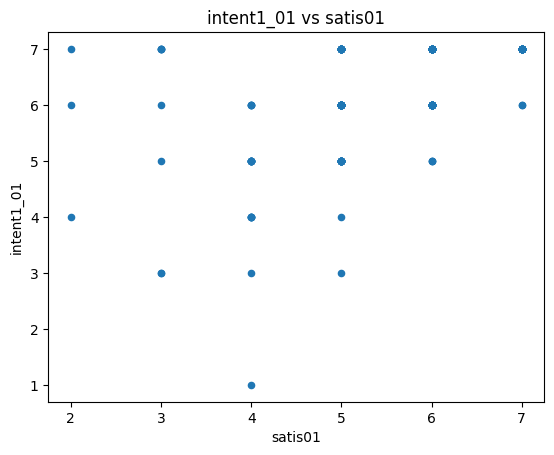

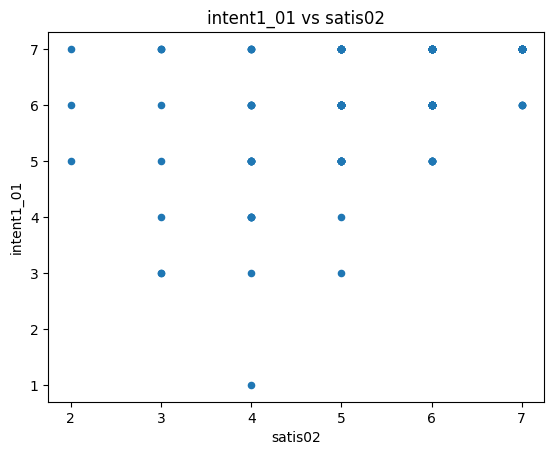

In [8]:
# Linearity scatterplot
for var in predictors:
    ect_df.plot.scatter(x=var, y=target)
    plt.title(f'{target} vs {var}')
    plt.xlabel(var)
    plt.ylabel(target)
    plt.show()


**Interpretation:**
- **attitude1_01**: There appears to be a moderate positive relationship with intent1_01. As attitude increases, intention to use generally increases.
- **attitude1_02**: A positive trend is visible, though weaker compared to attitude1_01.
- **peruse01**: A noticeable positive association is evident. Higher perceived usefulness is associated with higher intention to use.
- **satis01**: The relationship with intent1_01 appears weaker and more dispersed, suggesting limited predictive power.
- **satis02**: Similarly, the relationship with intent1_01 is weak, with scattered points suggesting low explanatory value.

Next we will check the Collinearity of the data. This is important as we need to make sure that our predictors are not correlated with each other. 

In [9]:
# Corr matrix
model_df.corr()
# VIF calculation
vif_scores = {}
for var in predictors:
    lin_temp = LinearRegression()
    X_temp = model_df[[v for v in predictors if v != var]]
    y_temp = model_df[var]
    lin_temp.fit(X_temp, y_temp)
    vif = 1 / (1 - lin_temp.score(X_temp, y_temp))
    vif_scores[var] = vif

vif_scores


{'attitude1_01': 3.208845371618712,
 'attitude1_02': 2.657443388799626,
 'peruse01': 1.548590185415177,
 'satis01': 4.484162683589695,
 'satis02': 4.341000167261285}

### Collinearity

| Variable      | VIF Score |
|:--------------|:----------|
| attitude1_01  | 3.21       |
| attitude1_02  | 2.66       |
| peruse01      | 1.55       |
| satis01       | 4.48       |
| satis02       | 4.34       |

**Interpretation:**
- All VIF values are **below 5**, suggesting that **multicollinearity is not a serious concern** in this model.
- satis01 and satis02 have higher VIF scores compared to the others but remain within an acceptable range.

Therefore, the predictors can be retained without concern for multicollinearity.

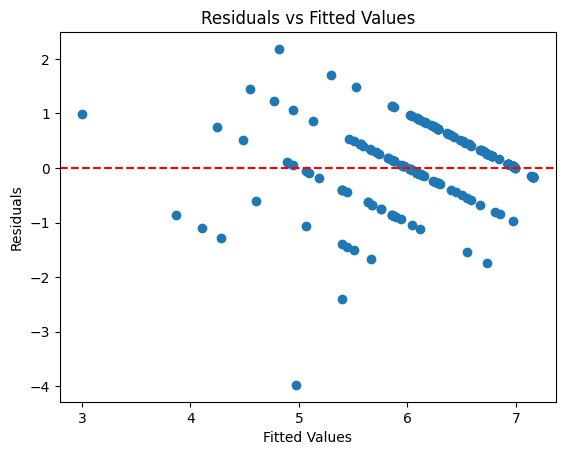

In [10]:
# Residual plot for homoscedasticity
plt.scatter(lin_reg.fittedvalues, lin_reg.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.show()


### Homoscedasticity

A residuals vs fitted values plot was generated to assess whether residuals exhibit constant variance (homoscedasticity).

**Interpretation:**
- The residuals are generally scattered randomly around the horizontal axis (y=0).
- No strong funnel shape, arching, or clear pattern is observed.
- A slight wedge shape at higher fitted values appears, but it is minor.

Based on the plot, **the assumption of homoscedasticity is reasonably satisfied** for this model.


In [14]:
#durbin-watson test for independence of errors
dw_stat = durbin_watson(lin_reg.resid)
print('Durbin-Watson Statistic:', dw_stat)


Durbin-Watson Statistic: 1.9294735718912375



**Interpretation:**
- The statistic falls within the acceptable range of 1.5 to 2.5.
- Therefore, the residuals appear to be independent of one another.

The assumption of independence is satisfied for this regression model.

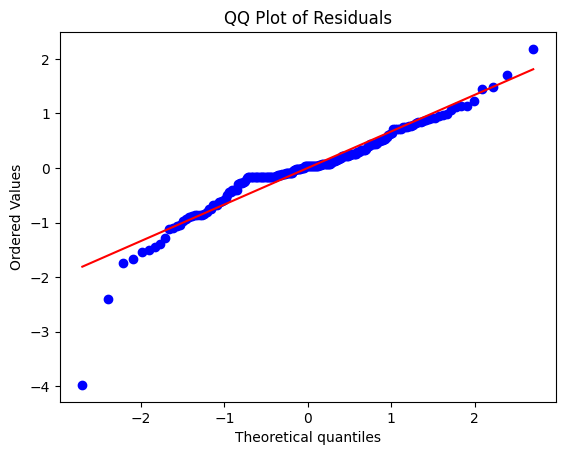

ShapiroResult(statistic=np.float64(0.9212982179983524), pvalue=np.float64(6.7878349691670805e-09))

In [15]:
# QQ plot
sts.probplot(lin_reg.resid, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()
# Shapiro-Wilk test for normality of residuals
shapiro(lin_reg.resid)

### Normality

A QQ plot was generated to assess the normality of residuals.

**Interpretation (QQ plot):**
- The majority of points closely follow the red diagonal line.
- Minor deviations are visible at the extreme tails.
- Overall, the plot suggests that the residuals are approximately normally distributed.

Based on the QQ plot, the normality assumption is reasonably satisfied.

### Conclusion

This analysis assessed the relationship between employee attitudes, perceived usefulness, satisfaction, and their intention to adopt a new system. After validating model assumptions and performing regression analysis, the results suggest that attitude1_01 and peruse01 are statistically significant predictors. Improving employees attitudes toward the system and emphasizing its usefulness appear to have the strongest positive impacts on intent to use. The model explains approximately 53.6% of the variability in adoption intent (R² = 0.536) and satisfies key assumptions including linearity, independence, homoscedasticity, and approximate normality. These findings can help inform targeted strategies to drive successful system adoption within the organization.
